# Glassdoor EDA Project

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Part 1: Getting Familiar with the Data


### Part 1a: Loading, displaying, and taking dimensions of the data

In [44]:
# Load the dataset
salary_data = pd.read_csv('eda_data.csv')

# Display the first five rows
salary_data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [45]:
# Take 5 random rows; are there any issues with data?
# For example, note Company Name having a rating attached

salary_data.sample(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
14,14,Data Scientist,$83K-$144K (Glassdoor est.),Job Description\n\n\nTakeda is looking for a D...,3.7,Takeda Pharmaceuticals\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,...,239,1,0,1,0,0,data scientist,na,3731,3
564,564,Corporate Risk Data Analyst (SQL Based) - Milw...,$43K-$77K (Glassdoor est.),"Job Summary\nUnder supervision and guidance, t...",3.8,Associated Banc-Corp\n3.8,"Green Bay, WI","Green Bay, WI",1001 to 5000 employees,1870,...,150,0,0,0,1,1,analyst,na,4103,3
140,140,Sr. Data Scientist,$80K-$130K (Glassdoor est.),The position\n\nWere seeking an entrepreneuria...,3.7,Evolve Vacation Rental\n3.7,"Denver, CO","Denver, CO",201 to 500 employees,2011,...,9,1,0,0,0,0,data scientist,senior,3353,0
452,452,Data Scientist,$87K-$140K (Glassdoor est.),PDI provides services across all verticals and...,3.9,Serigor Inc.\n3.9,"San Francisco, CA","Baltimore, MD",1 to 50 employees,-1,...,-1,1,0,0,0,0,data scientist,na,2759,0
41,41,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,...,-1,0,0,0,0,1,data engineer,na,1996,0


## Part 2: Data Exploration

### Part 2a: Taking dimensions and checking for nulls

In [46]:
# Get dataset info and see non-nulls/check for nulls
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

It seems like our data is clean. But through examining the raw .csv file, we can see many '-1' and 'unknown' values in place of a N/A value; let's change those to nulls and run our check again.

In [47]:
# changing all unknowns to NaN
for column in salary_data:
    salary_data.loc[salary_data[column] == -1, column] = np.nan

# changing all -1s to NaN
for column in salary_data:
    salary_data.loc[salary_data[column] == 'unknown', column] = np.nan

In [48]:
# change all rows with unrealistic and unknown ages to NaN

salary_data.loc[salary_data.age < 18, 'age'] = np.nan
salary_data.loc[salary_data.age > 80, 'age'] = np.nan

In [49]:
# Check for missing values, properly this time:
salary_data.isnull().sum()

Unnamed: 0             0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                11
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded               50
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors            0
hourly                 0
employer_provided      0
min_salary             0
max_salary             0
avg_salary             0
company_txt            0
job_state              0
same_state             0
age                  432
python_yn              0
R_yn                   0
spark                  0
aws                    0
excel                  0
job_simp               0
seniority              0
desc_len               0
num_comp               0
dtype: int64

As we can now see, 11 jobs lack a rating, 50 have no date listed for year founded, and a whopping 432 had no age or an impossible one. 

### Part 2b: Dropping columns

In [50]:
# To efficiently drop every column we want to, we will pass a list into one drop statement

col_to_drop = ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Headquarters', 'desc_len', 'Competitors']
salary_data = salary_data.drop(col_to_drop, axis = 1)

In [51]:
# Now the dimensions of our data are: 
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             731 non-null    float64
 1   Location           742 non-null    object 
 2   Size               742 non-null    object 
 3   Founded            692 non-null    float64
 4   Type of ownership  742 non-null    object 
 5   Industry           742 non-null    object 
 6   Sector             742 non-null    object 
 7   Revenue            742 non-null    object 
 8   hourly             742 non-null    float64
 9   employer_provided  742 non-null    float64
 10  min_salary         742 non-null    float64
 11  max_salary         742 non-null    float64
 12  avg_salary         742 non-null    float64
 13  company_txt        742 non-null    object 
 14  job_state          742 non-null    object 
 15  same_state         742 non-null    float64
 16  age                310 non

### Part 2c: Handling nulls

So, with our data almost cleaned and down to 25 columns, how do we impute the nulls in rating, founded, and age?

In [52]:
# Handling rating first, ffill is a method that uses the last valid entry in a column to fill in the next NaN.
# This is fine for such a small number of nulls

salary_data.Rating.ffill()

0      3.8
1      3.4
2      4.8
3      3.8
4      2.9
      ... 
737    3.9
738    4.4
739    2.6
740    3.2
741    3.6
Name: Rating, Length: 742, dtype: float64

In [53]:
# Next is (year) Founded. There's more nulls here, but it's not a very useful column for analysis.
# So, we can impute the mode for each NaN

salary_data.Founded.fillna(salary_data.Founded.mode())

0      1973.0
1      1984.0
2      2010.0
3      1965.0
4      1998.0
        ...  
737    1830.0
738    2006.0
739    1984.0
740       NaN
741    1967.0
Name: Founded, Length: 742, dtype: float64

In [54]:
# Finally, age has to be handled. There's no good way to deal with a column where over half the values are null.
# Our group decided to not drop age, so we will have to remove each row with an invalid age.

salary_cleaned = salary_data.dropna(subset=['age'])

In [58]:
# This makes the final dimensions of our cleaned dataset 310 rows by 25 columns 

salary_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 310 entries, 0 to 741
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             310 non-null    float64
 1   Location           310 non-null    object 
 2   Size               310 non-null    object 
 3   Founded            310 non-null    float64
 4   Type of ownership  310 non-null    object 
 5   Industry           310 non-null    object 
 6   Sector             310 non-null    object 
 7   Revenue            310 non-null    object 
 8   hourly             310 non-null    float64
 9   employer_provided  310 non-null    float64
 10  min_salary         310 non-null    float64
 11  max_salary         310 non-null    float64
 12  avg_salary         310 non-null    float64
 13  company_txt        310 non-null    object 
 14  job_state          310 non-null    object 
 15  same_state         310 non-null    float64
 16  age                310 non-null

### Part 2d: Summary Statistics

In [56]:
# Now that we have clean data, here are the basic statistics of our dataset's interval and ratio variables.
# Of note are the seven interval and ratio variables here: Rating, Founded, min_salary, max_salary, avg_salary, age, and num_comp; see the report

salary_cleaned.describe[]()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,num_comp
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,3.605161,1981.035484,0.045161,0.009677,67.609677,117.567742,91.501613,0.583871,38.964516,0.506452,0.006452,0.206452,0.161290,0.532258,1.267742
std,0.559507,16.025931,0.207994,0.098055,26.480974,42.594577,35.820175,0.493712,16.025931,0.500767,0.080192,0.405413,0.368393,0.499765,1.431022
min,1.900000,1942.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1968.000000,0.000000,0.000000,49.000000,86.000000,67.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,1984.000000,0.000000,0.000000,61.000000,113.500000,87.500000,1.000000,36.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.900000,1996.000000,0.000000,0.000000,81.750000,142.000000,112.875000,1.000000,52.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,4.700000,2002.000000,1.000000,1.000000,176.000000,289.000000,232.500000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [132]:
# For all categorical variables:

category_salary_data = salary_cleaned.select_dtypes(include=['object']).columns
category_salary_data_df = salary_cleaned.select_dtypes(include=['object'])

print(category_salary_data)

Index(['Location', 'Size', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'company_txt', 'job_state', 'job_simp', 'seniority'],
      dtype='object')


In [135]:
category_salary_data_df['Location'].value_counts()

Location
New York, NY      21
Cambridge, MA     14
Chicago, IL       13
Rockville, MD     11
Pittsburgh, PA    11
                  ..
Cincinnati, OH     1
Novato, CA         1
Valencia, CA       1
Fort Worth, TX     1
Irvine, CA         1
Name: count, Length: 116, dtype: int64

In [136]:
category_salary_data_df['Size'].value_counts()

Size
1001 to 5000 employees     96
501 to 1000 employees      68
10000+ employees           45
201 to 500 employees       36
5001 to 10000 employees    34
51 to 200 employees        26
1 to 50 employees           5
Name: count, dtype: int64

In [137]:
category_salary_data_df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 151
Company - Public                   78
Nonprofit Organization             27
Subsidiary or Business Segment     19
Government                         14
College / University               11
Hospital                            8
Other Organization                  1
Unknown                             1
Name: count, dtype: int64

In [138]:
category_salary_data_df['Industry'].value_counts()

Industry
Computer Hardware & Software                29
Biotech & Pharmaceuticals                   27
IT Services                                 24
Health Care Services & Hospitals            22
Insurance Carriers                          21
Advertising & Marketing                     17
Consulting                                  16
Energy                                      14
Research & Development                      14
Colleges & Universities                     14
Enterprise Software & Network Solutions     11
Aerospace & Defense                         10
Federal Agencies                            10
Travel Agencies                              7
Real Estate                                  7
Gambling                                     4
Food & Beverage Manufacturing                4
Lending                                      4
Gas Stations                                 4
Financial Analytics & Research               4
Telecommunications Services                  4
Inve

In [139]:
category_salary_data_df['Sector'].value_counts()

Sector
Information Technology                65
Business Services                     53
Biotech & Pharmaceuticals             27
Health Care                           22
Insurance                             21
Finance                               20
Oil, Gas, Energy & Utilities          14
Education                             14
Aerospace & Defense                   10
Government                            10
Manufacturing                          9
Retail                                 9
Real Estate                            7
Travel & Tourism                       7
Telecommunications                     6
Media                                  5
Arts, Entertainment & Recreation       4
Transportation & Logistics             3
Construction, Repair & Maintenance     3
Non-Profit                             1
Name: count, dtype: int64

In [140]:
category_salary_data_df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            58
$1 to $2 billion (USD)              43
$500 million to $1 billion (USD)    39
$100 to $500 million (USD)          39
$10+ billion (USD)                  36
$2 to $5 billion (USD)              26
$25 to $50 million (USD)            22
$50 to $100 million (USD)           21
$10 to $25 million (USD)            11
$5 to $10 billion (USD)             10
$5 to $10 million (USD)              5
Name: count, dtype: int64

In [151]:
# Note: including all categories only displays the head and tail, so this is the most I can show.
category_salary_data_df['company_txt'].value_counts().iloc[1:30]

company_txt
PNNL                                      10
MITRE                                      8
Advanced BioScience Laboratories           7
Novartis                                   7
Fareportal                                 7
Esri                                       6
Autodesk                                   4
Genentech                                  4
San Manuel Casino                          4
Texas Health Huguley Hospital              4
Central California Alliance for Health     4
Pilot Flying J Travel Centers LLC          4
TransUnion                                 4
Palermo's Pizza                            4
Juniper Networks                           4
ManTech                                    4
Mcphail Associates                         3
NCSOFT                                     3
Moser Consulting                           3
National Interstate                        3
MetroStar Systems                          3
MathWorks                                  

In [142]:
category_salary_data_df['job_state'].value_counts()

job_state
CA    55
MA    27
NY    25
VA    22
MD    21
PA    17
TX    17
WA    16
IL    13
OH    10
NJ     8
TN     7
WI     7
NC     6
AZ     6
FL     6
AL     5
MO     5
MI     5
CO     4
CT     3
IN     3
NE     3
DC     3
OR     3
KS     3
IA     3
MN     2
NM     1
ID     1
GA     1
LA     1
UT     1
Name: count, dtype: int64

In [ ]:
category_salary_data_df['job_simp'].value_counts()

In [134]:
category_salary_data_df['seniority'].value_counts()

seniority
na        233
senior     75
jr          2
Name: count, dtype: int64

## Part 3: Univariate Analysis
### Part 3a: Numerical variable distribution

In [166]:
numeric_salary_data = salary_cleaned.select_dtypes(include=['number']).columns
numeric_salary_data_df = salary_cleaned.select_dtypes(include=['number'])

print(numeric_salary_data)

Index(['Rating', 'Founded', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'num_comp'],
      dtype='object')


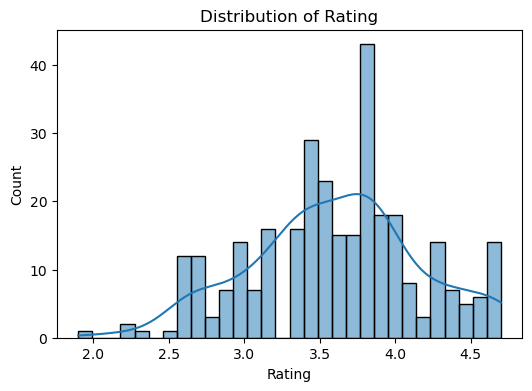

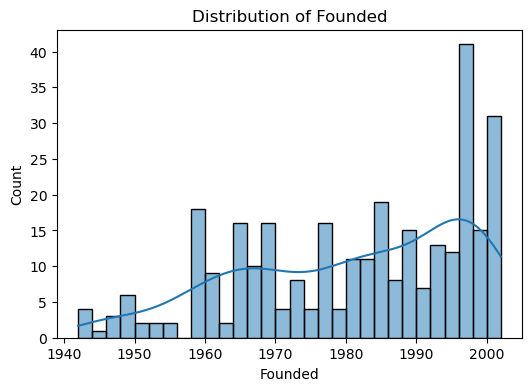

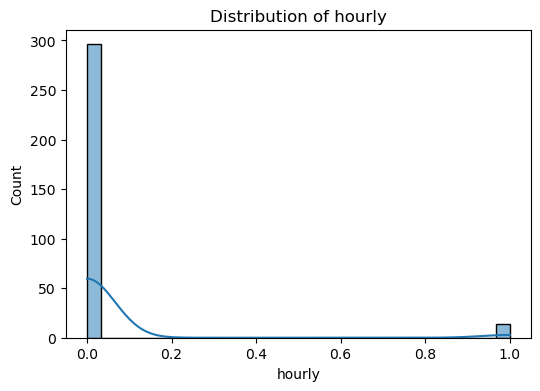

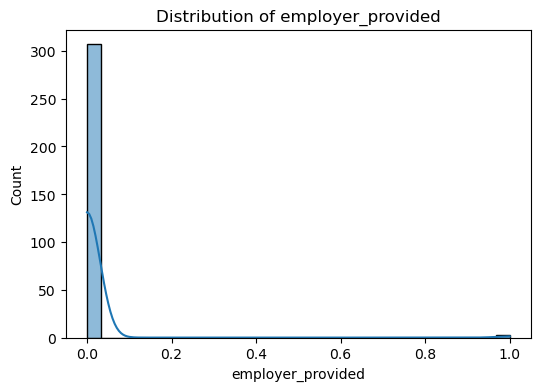

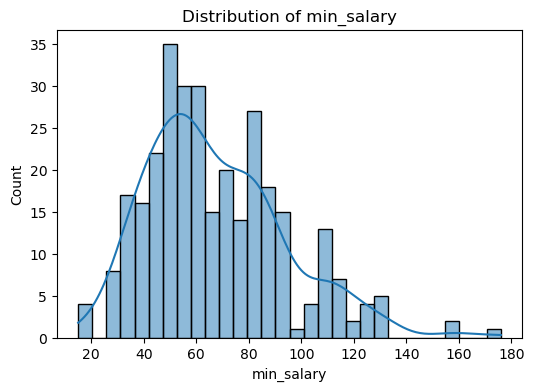

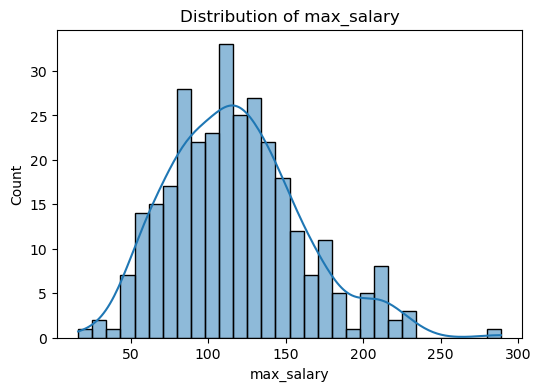

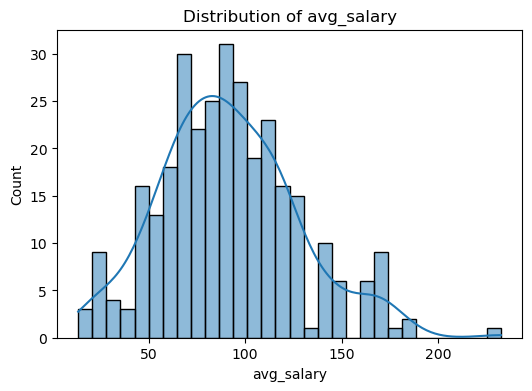

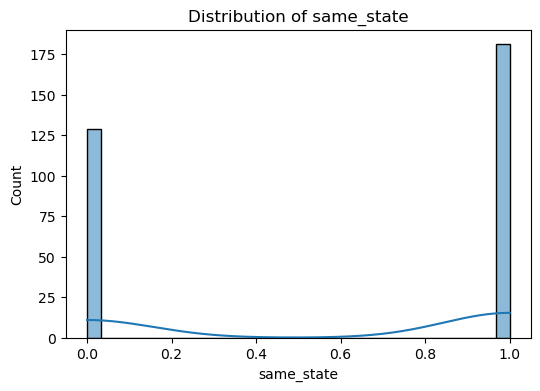

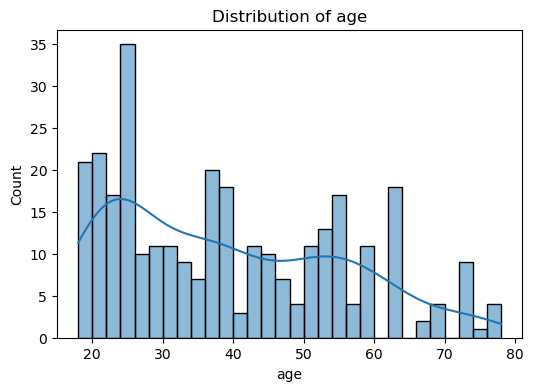

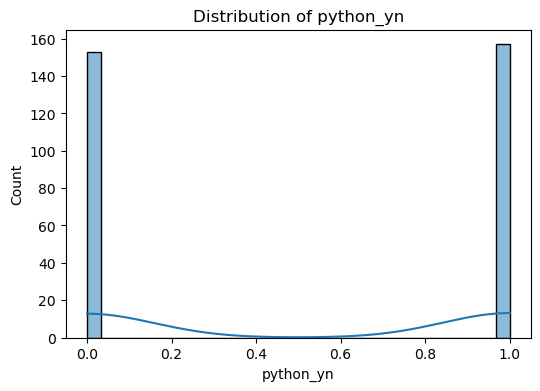

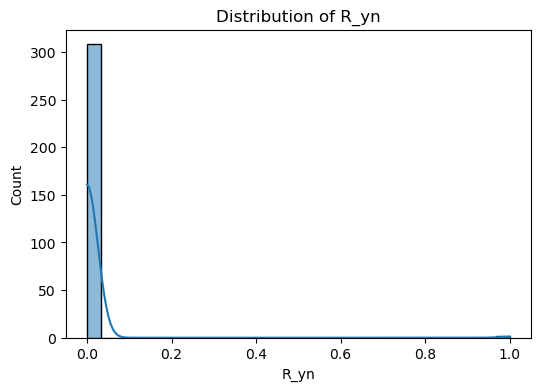

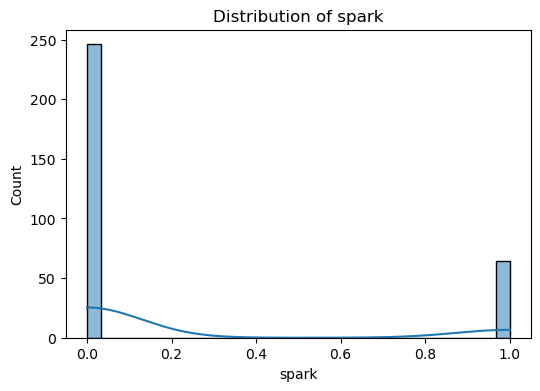

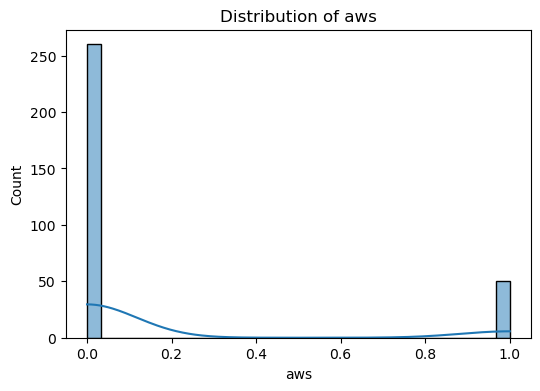

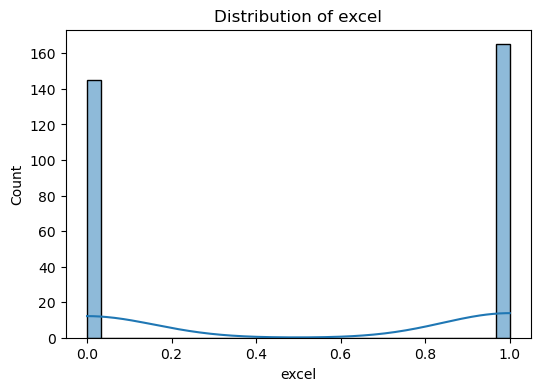

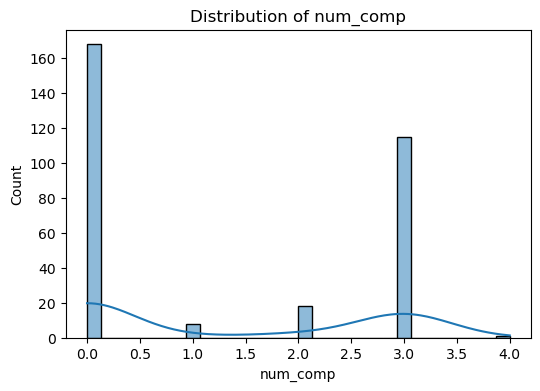

In [66]:
# Visualize the distributions of all numerical variables using histograms

for col in numeric_salary_data:
    plt.figure(figsize=(6, 4))
    sns.histplot(salary_cleaned[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Part 3: Univariate Analysis
### Part 3b: Categorical variable distribution

In [83]:
# Visualize all categorical variables using bar plots
# Note: A for loop did not work to generate graphs, hence the lower statement

for col in category_salary_data:
    print(col)

Location
Size
Type of ownership
Industry
Sector
Revenue
company_txt
job_state
job_simp
seniority


Text(0.5, 1.0, '10 Most Common Cities for Data Science Jobs')

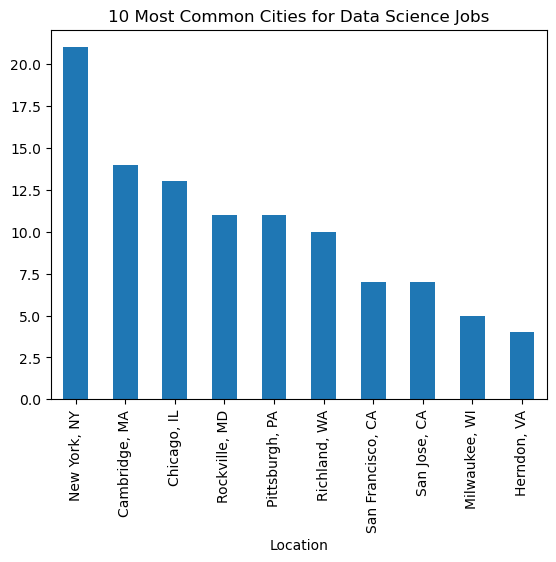

In [123]:
salary_cleaned['Location'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('10 Most Common Cities for Data Science Jobs')

<Axes: xlabel='Size'>

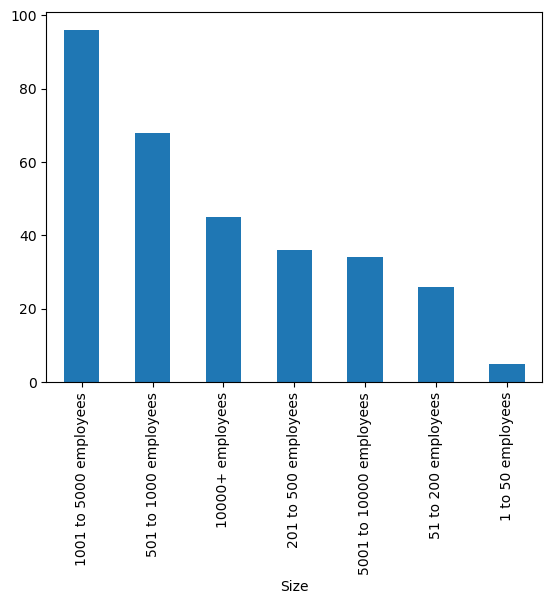

In [100]:
salary_cleaned['Size'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Distribution of Company Size')

Text(0.5, 1.0, 'Frequency of Company Ownership Type')

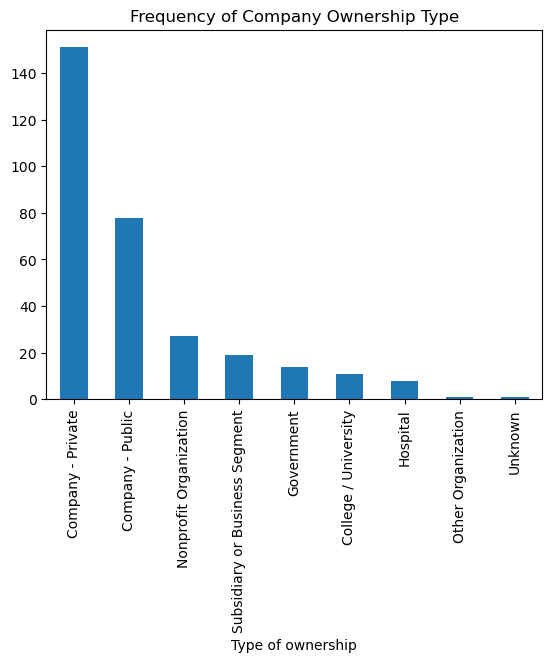

In [122]:
salary_cleaned['Type of ownership'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of Company Ownership Type')

Text(0.5, 1.0, 'Frequency of Job Industries')

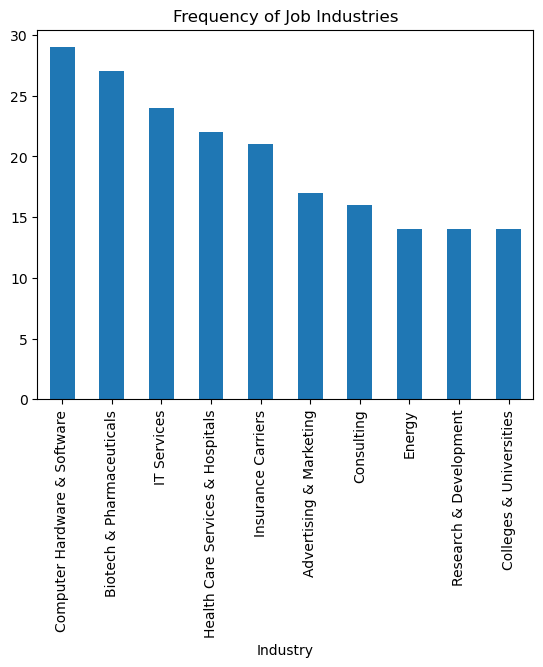

In [121]:
salary_cleaned['Industry'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of Job Industries')

Text(0.5, 1.0, 'Frequency of Job Sectors')

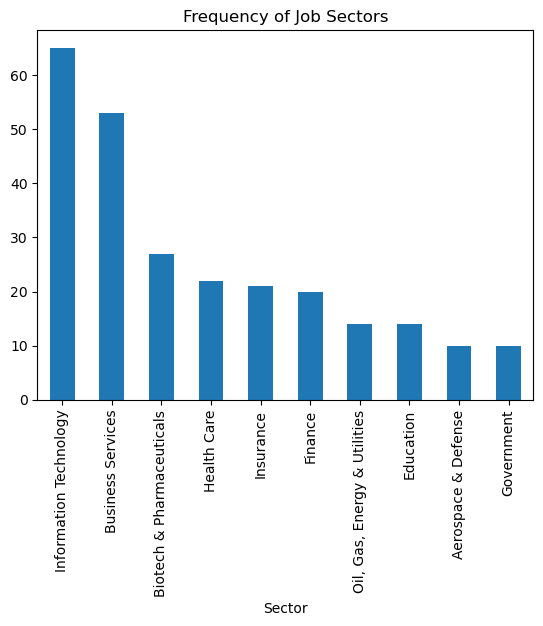

In [120]:
salary_cleaned['Sector'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of Job Sectors')

Text(0.5, 1.0, 'Frequency of Companies Generating Levels of Revenue')

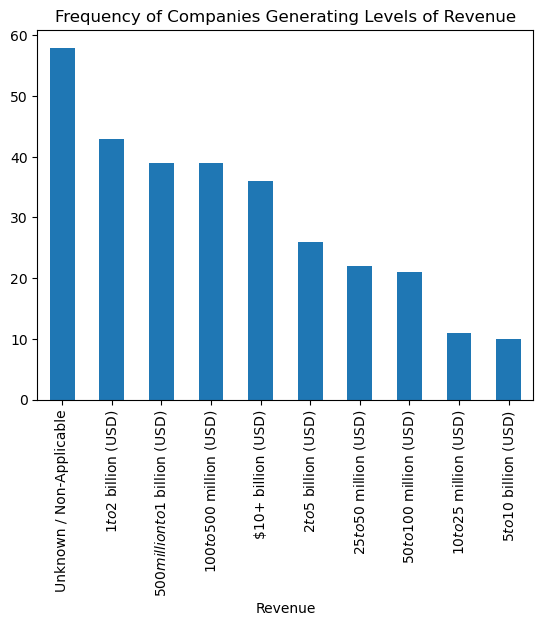

In [118]:
salary_cleaned['Revenue'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of Companies Generating Levels of Revenue')

Text(0.5, 1.0, '10 Most Common Companies')

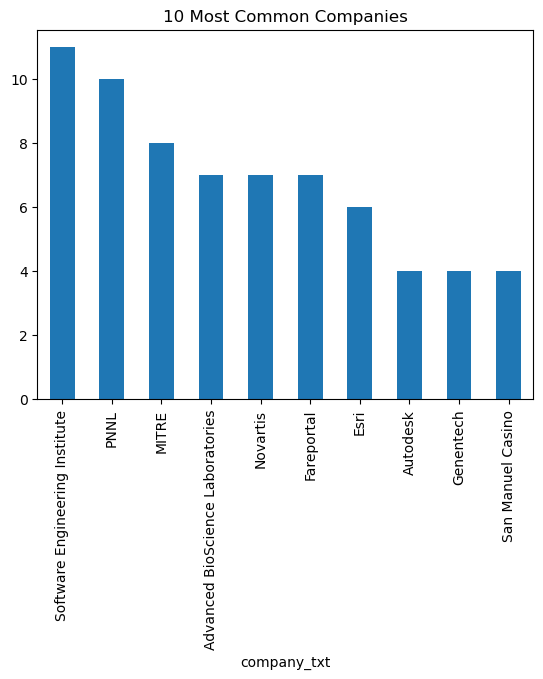

In [117]:
salary_cleaned['company_txt'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('10 Most Common Companies')

Text(0.5, 1.0, '10 Most Common States')

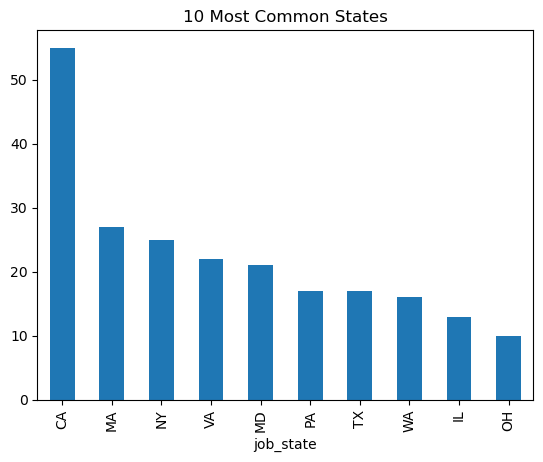

In [116]:
salary_cleaned['job_state'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('10 Most Common States')

Text(0.5, 1.0, 'Frequency of Data Sci Position')

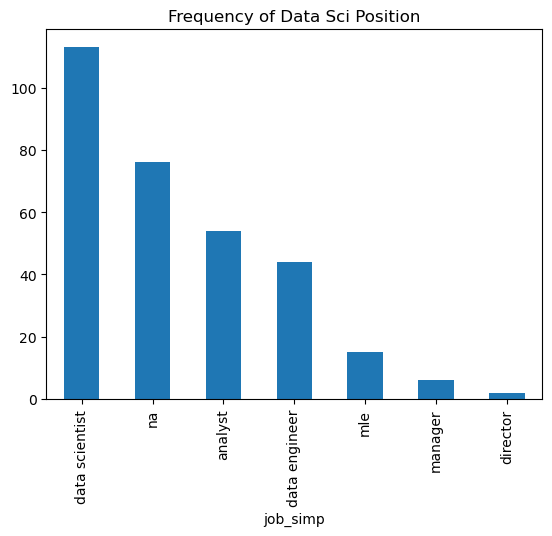

In [115]:
salary_cleaned['job_simp'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of Data Sci Position')

Text(0.5, 1.0, 'Count of level of Seniority')

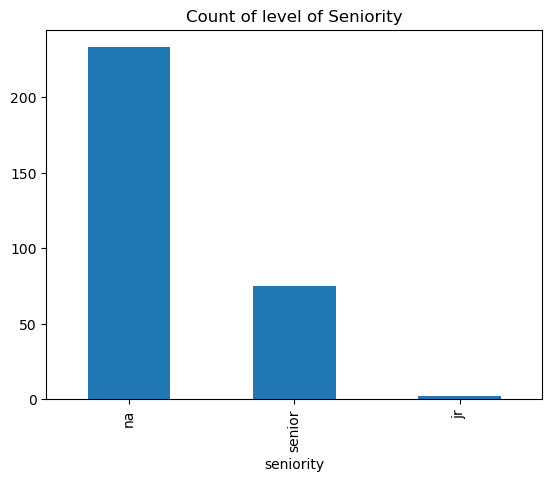

In [114]:
salary_cleaned['seniority'].value_counts().iloc[0:10].plot(kind='bar')
plt.title('Frequency of level of Seniority')

## Part 4: Bivariate Analysis
### Part 4a: Correlation Matrix Heatmap

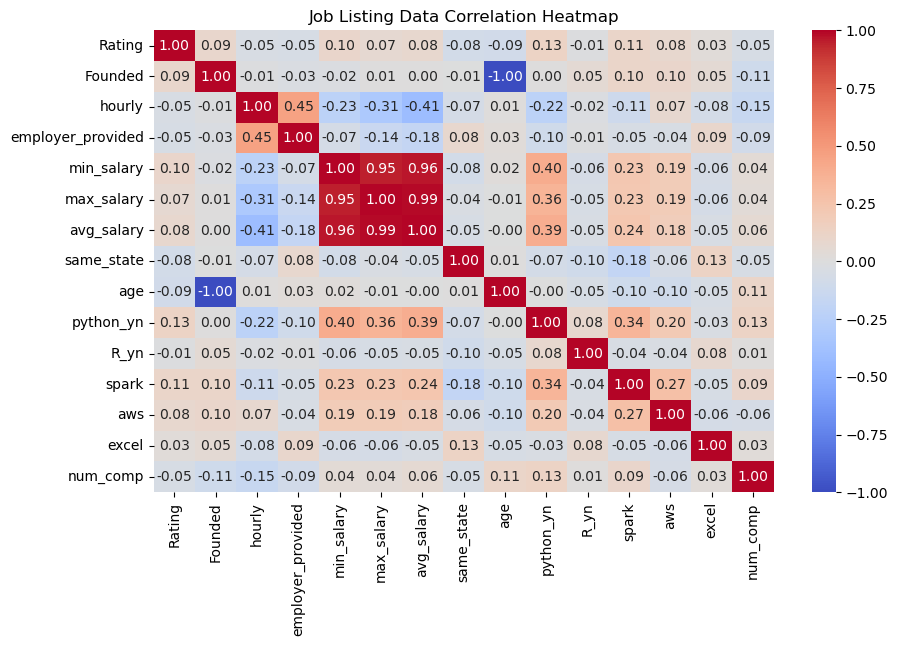

In [113]:
# To guide exploration of the data, we start with a correlation matrix heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_salary_data_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Job Listing Data Correlation Heatmap')
plt.show()

### Part 4b: Scatterplots

Text(0.5, 1.0, 'Salary Range in Thousands of USD')

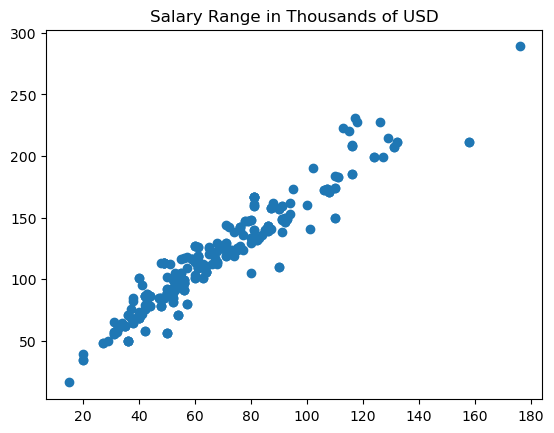

In [159]:
plt.scatter(x = salary_cleaned.min_salary, y = salary_cleaned.max_salary)
plt.title("Salary Range in Thousands of USD")

### Part 4c: Other Plots of Interest

In [190]:
numeric_salary_df_simp = salary_cleaned.drop(['Founded', 'Rating', 'hourly', 'employer_provided', 'same_state', 'age', 'R_yn', 'aws', 'spark', 'excel', 'num_comp'], axis = 1)

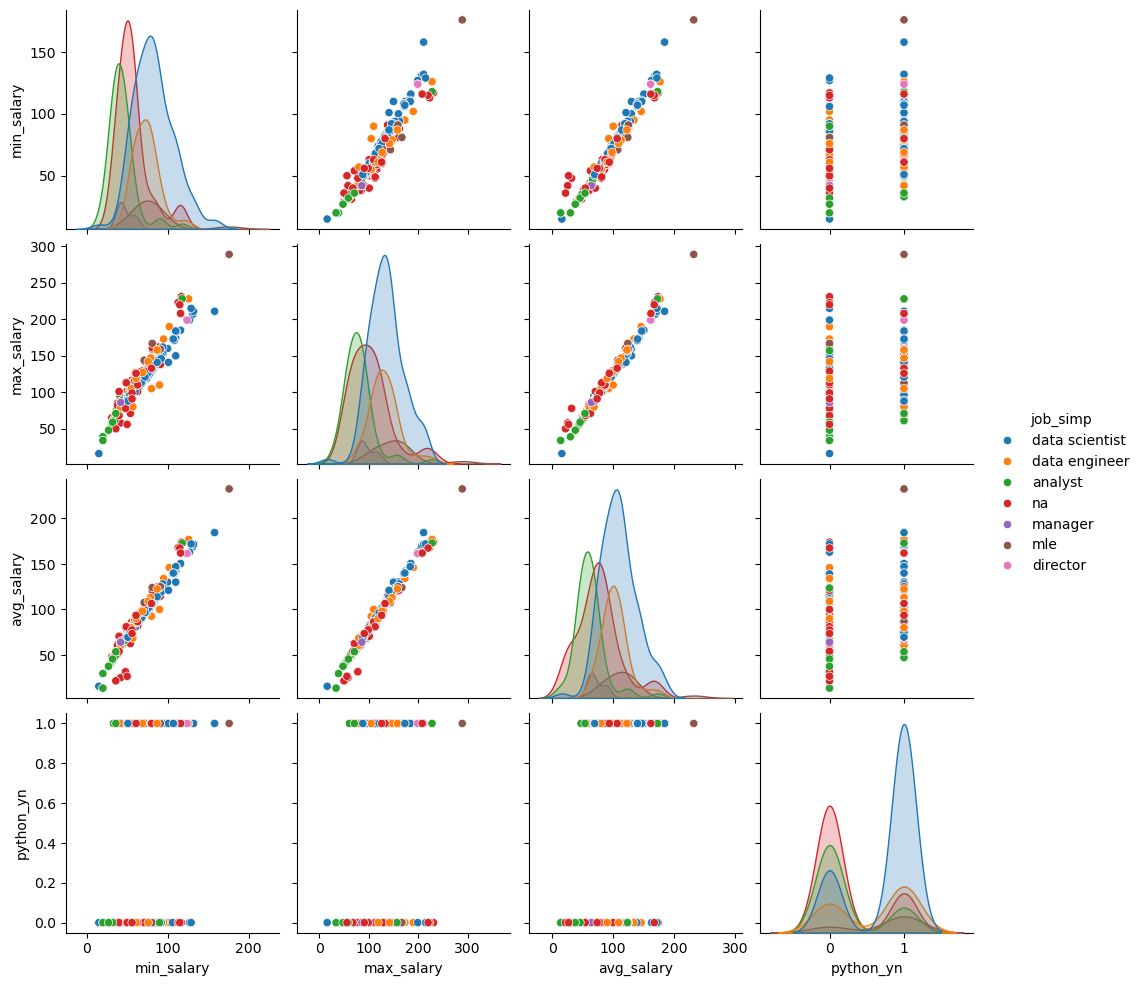

In [191]:
# Pairplot with results grouped by job position (job_simp)

sns.pairplot(numeric_salary_df_simp, hue = 'job_simp')

Text(0.5, 1.0, 'Average Salary Related to Job Position')

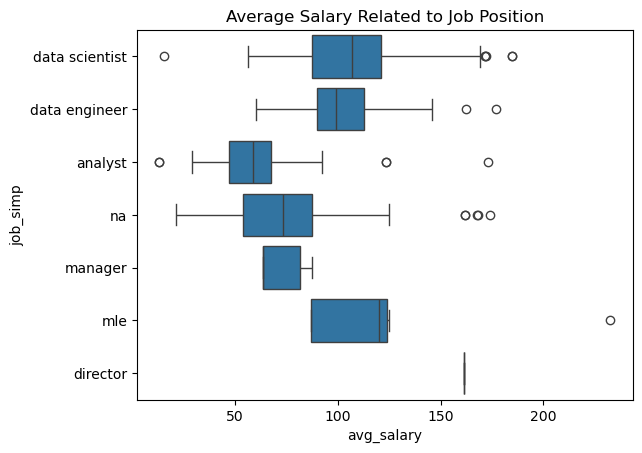

In [205]:
sns.boxplot(data = salary_cleaned, x="avg_salary", y="job_simp")
plt.title("Average Salary Related to Job Position")

Text(0.5, 1.0, 'Rating Related to Job Position')

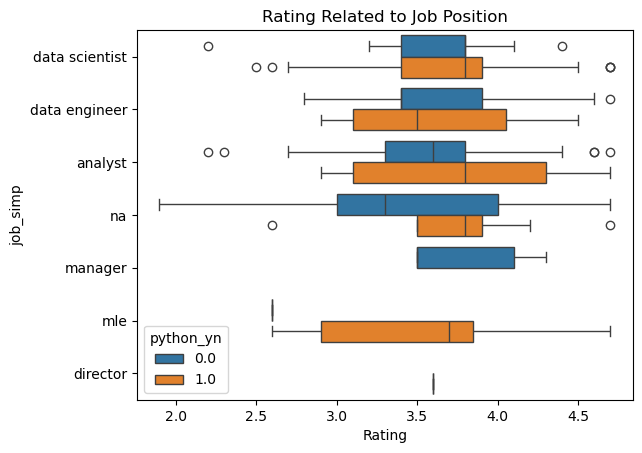

In [203]:
sns.boxplot(data = salary_cleaned, x="Rating", y="job_simp")
plt.title("Rating Related to Job Position")

Text(0.5, 1.0, 'Average Salary Related to Company Type')

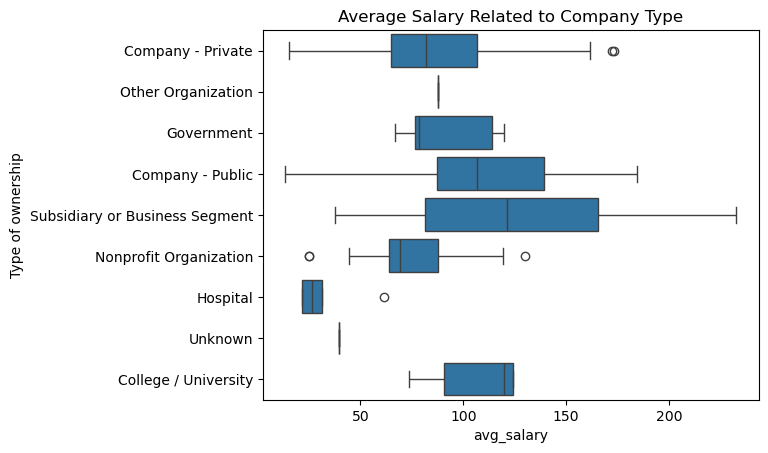

In [199]:
sns.boxplot(data = salary_cleaned, x="avg_salary", y="Type of ownership")
plt.title("Average Salary Related to Company Type")

Text(0.5, 1.0, 'Rating Related to Company Type')

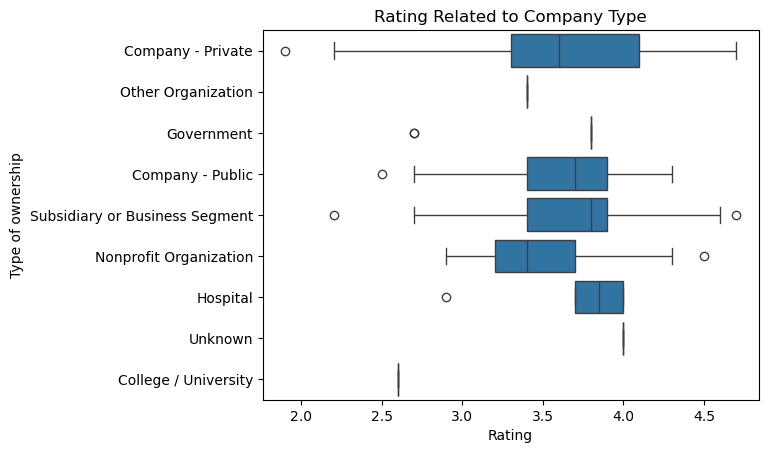

In [201]:
sns.boxplot(data = salary_cleaned, x="Rating", y="Type of ownership")
plt.title("Rating Related to Company Type")

Text(0.5, 1.0, 'Average Salary Related to Company Size')

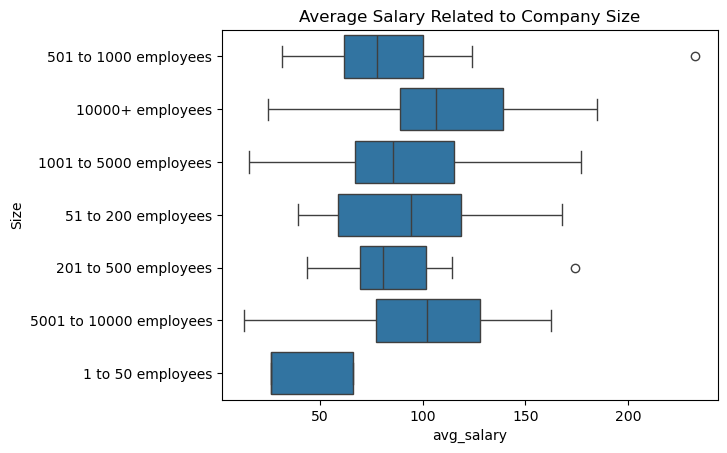

In [198]:
sns.boxplot(data = salary_cleaned, x="avg_salary", y="Size")
plt.title("Average Salary Related to Company Size")

Text(0.5, 1.0, 'Rating Related to Company Size')

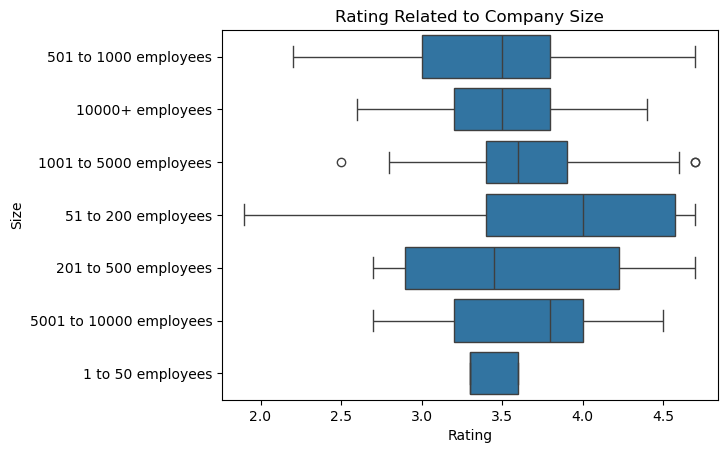

In [200]:
sns.boxplot(data = salary_cleaned, x="Rating", y="Size")
plt.title("Rating Related to Company Size")

## Part 5: Final Summary and Reflection

If there was one thing to emphasize about the data, it would be this. Do not assume any strong correlations exist between most aspects of a data science job and its employee besides very simple facts like seniority, larger company size, and Python skills leading to higher salaries. It feels underwhelming to say after so much statistical work that there aren’t many insights here, but there simply aren’t. Data scientists and engineers tend to do the best in measures of rating and salary and smaller and very large companies are in a similar position. These jobs concentrate in wealthier states with large urban centers like Massachusetts, New York, and Boston. It feels obvious to say, but these are the most defined characteristics of the data set. This analysis lends a very detailed view of the job market during this time, but it is only an outside view; any ‘why’s are vague and few in number.

Focusing on what could be done differently, what comes to mind first is seeing if this dataset holds up across time and across other job platforms. This is only 300 postings from one website in 2017, but what about years after? Data should always be relevant, and this analysis will become less so as we move away from that period. In other words, the data needs to be broader, timelier, and larger in volume. Then it could be more certain if these low correlations across the board are that way, or merely in our sample. As we learn more statistical methods and ways to use them in software packages, perhaps better methods and new angles to analysis the data would reveal information that we as inexperienced students are missing. Other than these things, we are unsure how else to glean better results.
